In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
BASE = '/content/drive/MyDrive/ds_Ronak_Khetta'   # all files here
CSV_DIR = os.path.join(BASE,'csv_files')
OUT_DIR = os.path.join(BASE,'outputs')
os.makedirs(CSV_DIR, exist_ok=True)
os.makedirs(OUT_DIR, exist_ok=True)
print("Working folder:", BASE)

Mounted at /content/drive
Working folder: /content/drive/MyDrive/ds_Ronak_Khetta


In [2]:
!pip install --quiet gdown

# Google Drive IDs (from the links you shared)
hist_id = "1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs"
fg_id   = "1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf"

# Download into your ds_Ronak_Khetta/csv_files folder
!gdown --id {hist_id} -O "{CSV_DIR}/historical_raw.csv"
!gdown --id {fg_id} -O "{CSV_DIR}/fear_greed.csv"

import glob
print("Files downloaded:", glob.glob(CSV_DIR + "/*"))

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/drive/MyDrive/ds_Ronak_Khetta/csv_files/historical_raw.csv
100% 47.5M/47.5M [00:00<00:00, 51.1MB/s]
/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/drive/MyDrive/ds_Ronak_Khetta/csv_files/fear_greed.csv
100% 90.8k/90.8k [00:00<00:00, 5.01MB/s]
Files downloaded: ['/content/drive/MyDrive/ds_Ronak_Khetta/csv_files/fear_greed.csv', '/content/drive/MyDrive/ds_Ronak_Khetta/csv_files/historical_raw.csv', '/conte

In [4]:
import pandas as pd

# Load Fear & Greed dataset
fg = pd.read_csv(f"{CSV_DIR}/fear_greed.csv")
fg['date'] = pd.to_datetime(fg['date'], errors='coerce')
fg['date'] = fg['date'].dt.date

print("Fear/Greed sample:")
print(fg.head())

# Load Historical trader dataset
hist = pd.read_csv(f"{CSV_DIR}/historical_raw.csv", low_memory=False)
print("Historical columns:", hist.columns.tolist()[:20])
hist.head()

Fear/Greed sample:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
Historical columns: ['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [9]:
# Try to find a time column in historical
import pandas as pd

if 'time' in hist.columns:
    hist['time_parsed'] = pd.to_datetime(hist['time'], errors='coerce')
elif 'Timestamp IST' in hist.columns:
    # This column appears to be in 'DD-MM-YYYY HH:MM' format
    hist['time_parsed'] = pd.to_datetime(hist['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')
elif 'timestamp' in hist.columns:
    # assume unix seconds
    hist['time_parsed'] = pd.to_datetime(hist['timestamp'], unit='s', errors='coerce')
else:
    hist['time_parsed'] = pd.NaT

hist['trade_date'] = pd.to_datetime(hist['time_parsed'].dt.date)

# Convert 'date' in fg to datetime objects for merging
fg['date'] = pd.to_datetime(fg['date'])

# Merge
merged = hist.merge(
    fg[['date','classification']].drop_duplicates(),
    left_on='trade_date',
    right_on='date',
    how='left'
)

print("Merged rows:", len(merged))
print("Classification counts:\n", merged['classification'].value_counts(dropna=False).head())

Merged rows: 211224
Classification counts:
 classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: count, dtype: int64


In [10]:
import numpy as np

# Make sure PnL column exists
if 'closedPnL' in merged.columns:
    merged['closedPnL'] = pd.to_numeric(merged['closedPnL'], errors='coerce')
else:
    # find any column with 'pnl' in name
    pnl_col = [c for c in merged.columns if 'pnl' in c.lower()]
    if pnl_col:
        merged['closedPnL'] = pd.to_numeric(merged[pnl_col[0]], errors='coerce')
    else:
        merged['closedPnL'] = np.nan

# Account
if 'account' not in merged.columns:
    merged['account'] = 'unknown'

# Leverage
if 'leverage' not in merged.columns:
    merged['leverage'] = np.nan

# Add features
merged['is_win'] = merged['closedPnL'] > 0

In [12]:
agg_sent = merged.groupby('classification').agg(
    trades=('account','count'),
    total_pnl=('closedPnL','sum'),
    avg_pnl=('closedPnL','mean'),
    win_rate=('is_win', 'mean'),
    median_leverage=('leverage','median')
).reset_index()

agg_sent.to_csv(f"{CSV_DIR}/agg_by_sentiment.csv", index=False)
agg_sent

,classification,trades,total_pnl,avg_pnl,win_rate,median_leverage
0,Extreme Fear,21400,7.391102e+05,34.537862,0.370607,NaN
1,Extreme Greed,39992,2.715171e+06,67.892861,0.464943,NaN
2,Fear,61837,3.357155e+06,54.290400,0.420768,NaN
3,Greed,50303,2.150129e+06,42.743559,0.384828,NaN
4,Neutral,37686,1.292921e+06,34.307718,0.396991,NaN


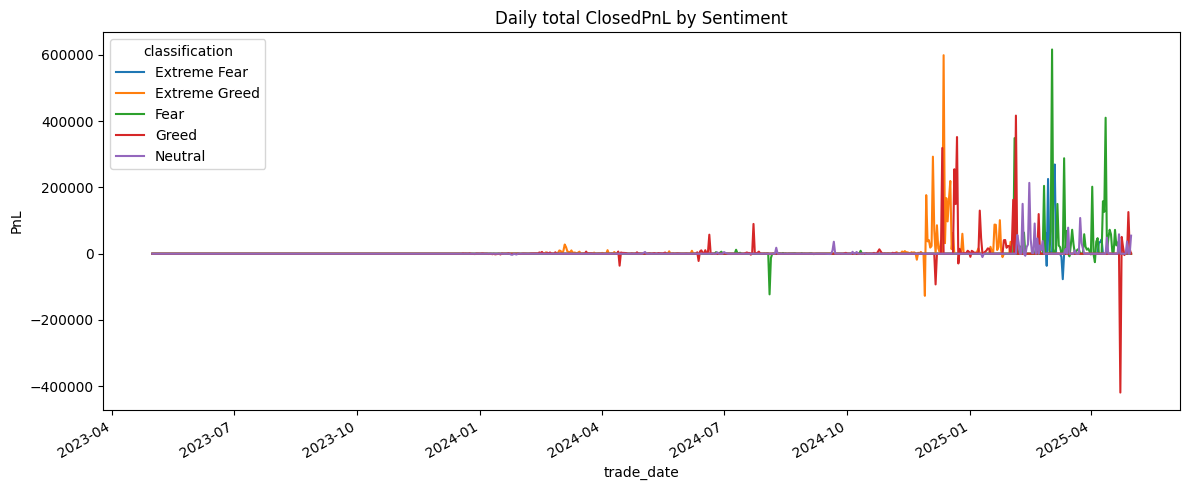

In [14]:
import matplotlib.pyplot as plt

# Daily pnl plot
daily = merged.groupby(['trade_date','classification']).agg(total_pnl=('closedPnL','sum')).reset_index()
pivot = daily.pivot(index='trade_date', columns='classification', values='total_pnl').fillna(0)

plt.figure(figsize=(12,5))
pivot.plot(ax=plt.gca())
plt.title("Daily total ClosedPnL by Sentiment")
plt.ylabel("PnL")
plt.tight_layout()
plt.savefig(f"{OUT_DIR}/daily_pnl.png")
plt.show()

In [15]:
merged.to_csv(f"{CSV_DIR}/merged_processed.csv", index=False)
print("Saved processed data and outputs into Google Drive.")

Saved processed data and outputs into Google Drive.
